In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch


def running_average(x, N):
    ''' Function used to compute the running average
        of the last N elements of a vector x
    '''
    if len(x) >= N:
        y = np.copy(x)
        y[N-1:] = np.convolve(x, np.ones((N, )) / N, mode='valid')
    else:
        y = np.zeros_like(x)
    return y

In [3]:
finalNetwork = np.load('Plots/Plot_data2_finalNetwork.npy',allow_pickle=True).item()
highDiscount = np.load('Plots/Plot_data2_high_discount.npy',allow_pickle=True).item()
lowDiscount1 = np.load('Plots/Plot_data2_2_discount.npy',allow_pickle=True).item()
lowDiscount2 = np.load('Plots/Plot_data2_6_discount.npy',allow_pickle=True).item()
randomNet = np.load('Plots/Plot_data2_random.npy',allow_pickle=True).item()
doubleMem = np.load('Plots/Plot_data2_highMem.npy',allow_pickle=True).item()
halfMem = np.load('Plots/Plot_data2_lowMem.npy',allow_pickle=True).item()

In [4]:
episode_number_of_steps=finalNetwork['steps']
episode_reward_list = finalNetwork['rewards']

## Effect of discount factor

In [5]:
a = finalNetwork['steps'][0:500]
b = finalNetwork['rewards'][0:500]
c = highDiscount['steps'][0:500]
d = highDiscount['rewards'][0:500]
e = lowDiscount1['steps'][0:500]
f = lowDiscount1['rewards'][0:500]
g = lowDiscount2['steps'][0:500]
h = lowDiscount2['rewards'][0:500]

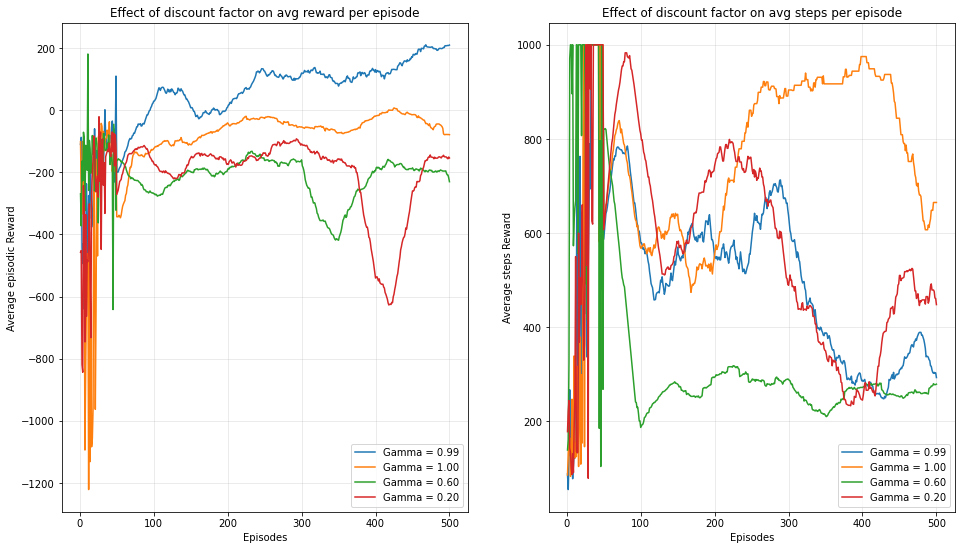

In [6]:
n_episodes=500
n_ep_running_average = 50
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))

ax[0].plot([i for i in range(1, n_episodes+1)], running_average(b, n_ep_running_average), label='Gamma = 0.99')
ax[0].plot([i for i in range(1, n_episodes+1)], running_average(d, n_ep_running_average), label='Gamma = 1.00')
ax[0].plot([i for i in range(1, n_episodes+1)], running_average(f, n_ep_running_average), label='Gamma = 0.60')
ax[0].plot([i for i in range(1, n_episodes+1)], running_average(h, n_ep_running_average), label='Gamma = 0.20')
ax[0].set_xlabel('Episodes')
ax[0].set_ylabel('Average episodic Reward')
ax[0].set_title('Effect of discount factor on avg reward per episode')
ax[0].legend()
ax[0].grid(alpha=0.3)


ax[1].plot([i for i in range(1, n_episodes+1)], running_average(a, n_ep_running_average), label='Gamma = 0.99')
ax[1].plot([i for i in range(1, n_episodes+1)], running_average(c, n_ep_running_average), label='Gamma = 1.00')
ax[1].plot([i for i in range(1, n_episodes+1)], running_average(e, n_ep_running_average), label='Gamma = 0.60')
ax[1].plot([i for i in range(1, n_episodes+1)], running_average(g, n_ep_running_average), label='Gamma = 0.20')
ax[1].set_xlabel('Episodes')
ax[1].set_ylabel('Average steps Reward')
ax[1].set_title('Effect of discount factor on avg steps per episode')
ax[1].legend()
ax[1].grid(alpha=0.3)
plt.show()

## Memory Size

In [7]:
a = finalNetwork['steps'][0:500]
b = finalNetwork['rewards'][0:500]
c = doubleMem['steps'][0:500]
d = doubleMem['rewards'][0:500]
e = halfMem['steps'][0:500]
f = halfMem['rewards'][0:500]

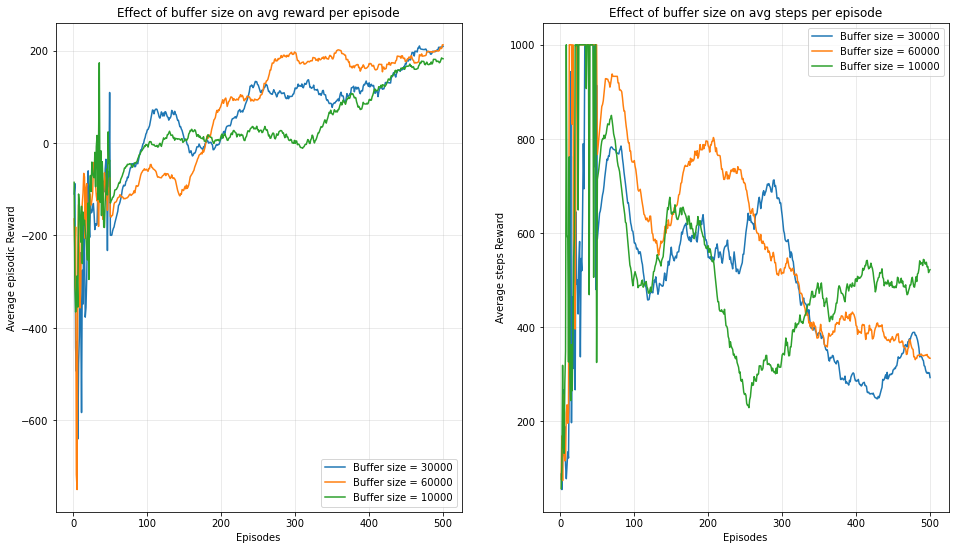

In [8]:
n_episodes=500
n_ep_running_average = 50
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))

ax[0].plot([i for i in range(1, n_episodes+1)], running_average(b, n_ep_running_average), label='Buffer size = 30000')
ax[0].plot([i for i in range(1, n_episodes+1)], running_average(d, n_ep_running_average), label='Buffer size = 60000')
ax[0].plot([i for i in range(1, n_episodes+1)], running_average(f, n_ep_running_average), label='Buffer size = 10000')

ax[0].set_xlabel('Episodes')
ax[0].set_ylabel('Average episodic Reward')
ax[0].set_title('Effect of buffer size on avg reward per episode')
ax[0].legend()
ax[0].grid(alpha=0.3)


ax[1].plot([i for i in range(1, n_episodes+1)], running_average(a, n_ep_running_average), label='Buffer size = 30000')
ax[1].plot([i for i in range(1, n_episodes+1)], running_average(c, n_ep_running_average), label='Buffer size = 60000')
ax[1].plot([i for i in range(1, n_episodes+1)], running_average(e, n_ep_running_average), label='Buffer size = 10000')

ax[1].set_xlabel('Episodes')
ax[1].set_ylabel('Average steps Reward')
ax[1].set_title('Effect of buffer size on avg steps per episode')
ax[1].legend()
ax[1].grid(alpha=0.3)
plt.show()

In [9]:
a = finalNetwork['steps'][0:500]
b = finalNetwork['rewards'][0:500]
c = randomNet['steps'][0:500]
d = randomNet['rewards'][0:500]

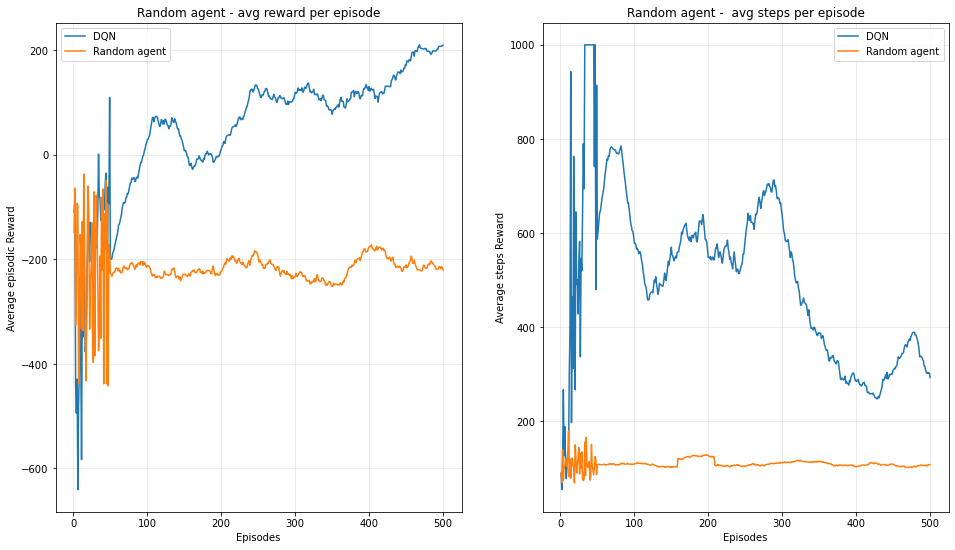

In [10]:
n_episodes=500
n_ep_running_average = 50
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))

ax[0].plot([i for i in range(1, n_episodes+1)], running_average(b, n_ep_running_average), label='DQN')
ax[0].plot([i for i in range(1, n_episodes+1)], running_average(d, n_ep_running_average), label='Random agent')


ax[0].set_xlabel('Episodes')
ax[0].set_ylabel('Average episodic Reward')
ax[0].set_title('Random agent - avg reward per episode')
ax[0].legend()
ax[0].grid(alpha=0.3)


ax[1].plot([i for i in range(1, n_episodes+1)], running_average(a, n_ep_running_average), label='DQN')
ax[1].plot([i for i in range(1, n_episodes+1)], running_average(c, n_ep_running_average), label='Random agent')


ax[1].set_xlabel('Episodes')
ax[1].set_ylabel('Average steps Reward')
ax[1].set_title('Random agent -  avg steps per episode')
ax[1].legend()
ax[1].grid(alpha=0.3)
plt.show()

In [16]:
import gym
from model import Actor,Critic
env = gym.make("LunarLanderContinuous-v2")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0] 
max_action = float(env.action_space.high[0])

In [17]:
actor = Actor(state_dim, action_dim, max_action)
critic = Critic(state_dim, action_dim)

In [21]:
actor.load_state_dict(torch.load('./neural-network-2-actor_state_dict.pth'))
critic.load_state_dict(torch.load('./neural-network-2-critic_state_dict.pth'))

<All keys matched successfully>

In [22]:
      state = np.asarray([0,0,0,0,0,0,0,0])
      state_tensor = torch.from_numpy(state).float().unsqueeze(0)

In [30]:
critic(state_tensor,actor(state_tensor)).detach().numpy()[0][0]

74.96241

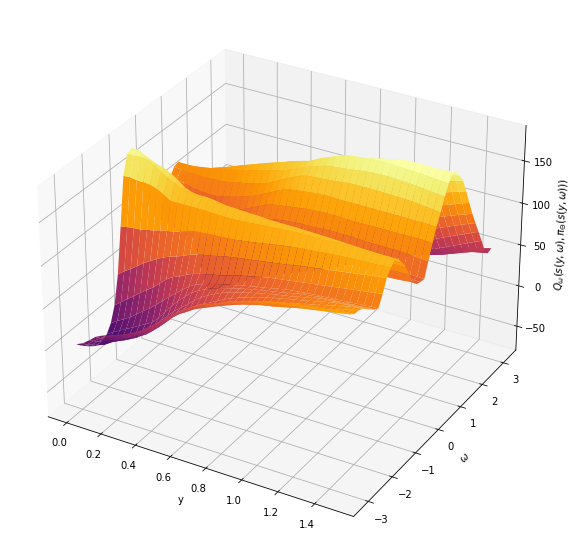

In [35]:

from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure(figsize=(15,10))

def fun(x, y):
    z=[]
    for i in range(x.shape[0]):
 
      state = np.asarray([0,x[i],0,0,y[i],0,0,0])
      state_tensor = torch.from_numpy(state).float().unsqueeze(0)
      z.append(critic(state_tensor,actor(state_tensor)).detach().numpy()[0][0])
    return z

# fig = plt.figure()

meshsize=40
x = np.linspace(0, 1.5, num=meshsize)
y = np.linspace(-np.pi, np.pi, num=meshsize)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,cmap='inferno')

ax.set_xlabel('y')
ax.set_ylabel('$\omega$')
ax.set_zlabel('$Q_{\omega}(s(y,\omega),\pi_{\Theta}(s(y,\omega)))$')

plt.show()

In [42]:
actor(state_tensor).detach().numpy()

array([[-0.8100452, -0.6836688]], dtype=float32)

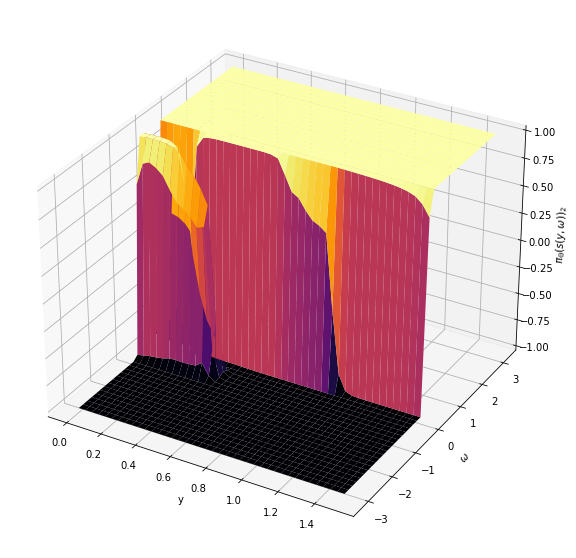

In [45]:
from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure(figsize=(15,10))

def fun(x, y):
    z=[]
    for i in range(x.shape[0]):
 
      state = np.asarray([0,x[i],0,0,y[i],0,0,0])
      state_tensor = torch.from_numpy(state).float().unsqueeze(0)
      z.append(actor(state_tensor).detach().numpy()[0][1])
    return z

# fig = plt.figure()

meshsize=40
x = np.linspace(0, 1.5, num=meshsize)
y = np.linspace(-np.pi, np.pi, num=meshsize)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z,cmap='inferno')

ax.set_xlabel('y')
ax.set_ylabel('$\omega$')
ax.set_zlabel('$\pi_{\Theta}(s(y,\omega))_2$')

plt.show()